<h2> CREAZIONE DELL SERIE STORICA </h2>

In [1]:
import pandas as pd
df = pd.read_csv('csv/serie_storica_8province.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,109
1,2015-01-02,104
2,2015-01-03,85
3,2015-01-04,80
4,2015-01-05,100


In [2]:
# converto le date
df['DATA'] = pd.to_datetime(df['DATA'])

In [3]:
#metto il campo 'Data' come indice
df=df.set_index('DATA')
df.head()

,TOTALE
DATA,
2015-01-01,109
2015-01-02,104
2015-01-03,85
2015-01-04,80
2015-01-05,100


In [13]:
df = df.groupby(pd.Grouper(freq='M')).sum()
df.head(10)

,TOTALE
DATA,
2015-01-31,2668
2015-02-28,2389
2015-03-31,2414
2015-04-30,2114
2015-05-31,1910
2015-06-30,1859
2015-07-31,2114
2015-08-31,2054
2015-09-30,1806


In [14]:
# creazione della serie storica
ts = df.TOTALE
ts.head()

DATA
2015-01-31    2668
2015-02-28    2389
2015-03-31    2414
2015-04-30    2114
2015-05-31    1910
Freq: M, Name: TOTALE, dtype: int64

<h3>Visualizzazione dei decessi giornalieri delle 8 province dal 2015 al 30 giugno 2020 </h3>

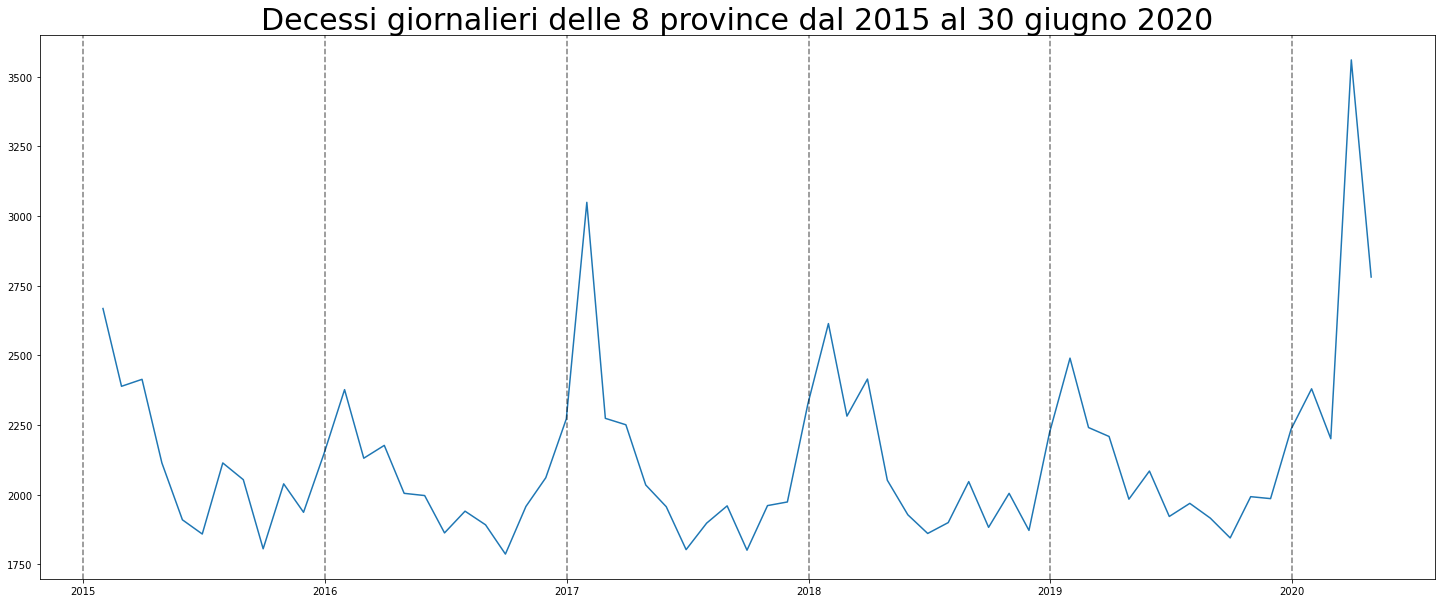

In [15]:
from datetime import datetime
from datetime import timedelta
start_date = datetime(2015,1,1)
end_date = datetime(2020,4,30)
lim_ts = ts[start_date:end_date]

#visulizzo il grafico della time series
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.title('Decessi giornalieri delle 8 province dal 2015 al 30 giugno 2020', size=30)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h2> DECOMPOSIZIONE DELLA SERIE </h2>

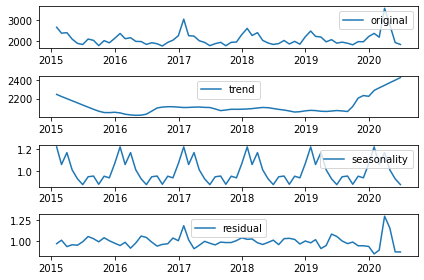

In [17]:
#decomposizione della serie in trend, stagionalità e residui - METODO MOLTIPLICATIVO
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=12, two_sided=True, extrapolate_trend=1, model='multiplicative')

ts_trend = decomposition.trend #andamento della curva
ts_seasonal = decomposition.seasonal #stagionalità 
ts_residual = decomposition.resid #parti rimanenti
plt.subplot(411)
plt.plot(ts,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

<h2> TEST DI STAZIONARIETA' </h2>

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False
        

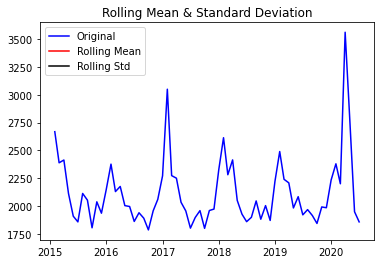

Results of Dickey-Fuller Test:
Test Statistic                -5.687144e+00
p-value                        8.229455e-07
#Lags Used                     7.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64
X is stationary


True

In [19]:
#verifico che la serie storica sia stazionaria
test_stationarity(ts)


<p> La <b>serie storica</b> è <b>stazionaria</b> </p>

<h2> AUTOCORRELAZIONE E AUTOCORRELAZIONE PARZIALE </h2>

In [20]:
from datetime import datetime
train_end = datetime(2019,10,31)
test_end = datetime (2019,12,31)
covid_end = datetime(2020,4,30)



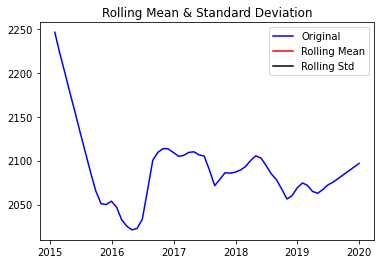

Results of Dickey-Fuller Test:
Test Statistic                 -3.835804
p-value                         0.002562
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64
X is not stationary


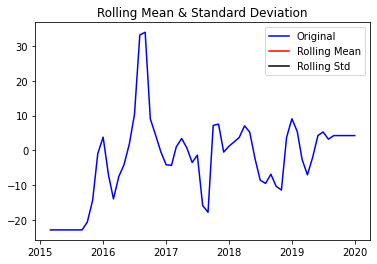

Results of Dickey-Fuller Test:
Test Statistic                 -3.182813
p-value                         0.021001
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
X is not stationary


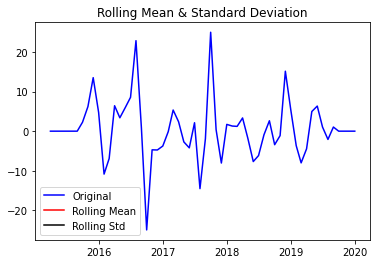

Results of Dickey-Fuller Test:
Test Statistic                 -5.339304
p-value                         0.000005
#Lags Used                      3.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64
X is stationary
2


In [96]:
from dateutil.relativedelta import *
tsb = ts[:test_end]
decomposition = seasonal_decompose(tsb, period=12, two_sided=True, extrapolate_trend=1, model='multiplicative')

tsb_trend = decomposition.trend #andamento della curva
tsb_seasonal = decomposition.seasonal #stagionalità 
tsb_residual = decomposition.resid #parti rimanenti


tsb_diff = pd.Series(tsb_trend)
d = 0
while test_stationarity(tsb_diff) is False:
    tsb_diff = tsb_diff.diff().dropna()
    d = d + 1
print(d)

#TEST: dal 01-01-2015 al 31-10-2019
train = tsb[:train_end]

#TRAIN: dal 01-11-2019 al 31-12-2019
test = tsb[train_end + relativedelta(months=+1): test_end]

In [98]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
nlags = 12
bacf, confint = acf(tsb, alpha=0.1, nlags=nlags)
bpacf, pconfint = pacf(tsb, alpha=0.1, nlags=nlags)
#plt.scatter(np.arange(0,12), bpacf[0:12])
#print(bpacf[0:12])
#print(confint[0:12])
p = 0
q = 0
for i in range(0,nlags):
    c_pacf = bpacf[0:nlags][i]
    c_pconfint = c_pacf - pconfint[0:nlags][i][0]
    #print("cpaf: " + str(c_pacf) + " confint: " + str(c_pconfint))
    if c_pacf > c_pconfint:
        q = i
    
    c_acf = bacf[0:nlags][i]
    c_confint = c_acf - confint[0:nlags][i][0]
    #print("cpaf: " + str(c_acf) + " confint: " + str(c_confint))
    if c_acf > c_confint:
        p = i
print(p)
print(q)

11
1


<h2> CREAZIONE TRAIN E TEST SET </h2>

<h1> CREAZIONE DEL MODELLO </h1>

In [100]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#p = 40
#q = 18
#d = 0
model = SARIMAX(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                 TOTALE   No. Observations:                   58
Model:              SARIMAX(11, 2, 1)   Log Likelihood                -363.247
Date:                Mon, 19 Oct 2020   AIC                            752.495
Time:                        16:52:27   BIC                            778.824
Sample:                    01-31-2015   HQIC                           762.702
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7841      0.248     -3.166      0.002      -1.270      -0.299
ar.L2         -0.6691      0.304     -2.198      0.028      -1.266      -0.073
ar.L3         -0.7481      0.218     -3.431      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<h3> Verifico che i residui del modello siano stazionari </h3>

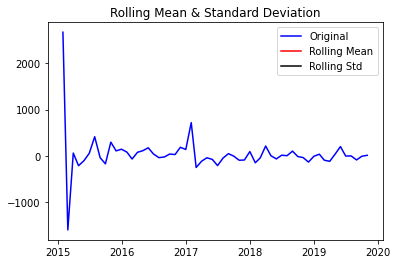

Results of Dickey-Fuller Test:
Test Statistic                -22.877489
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
X is stationary


True

In [101]:
#verifico che i residui del modello siano stazionari
residuals = model_fit.resid
test_stationarity(residuals)

<h3> Confronto dei valori del Train Set con i valori fittati del modello </h3>

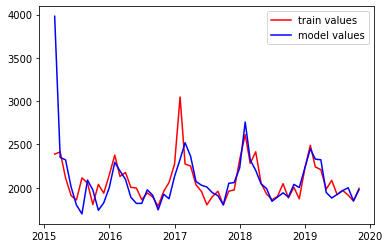

In [102]:
plt.plot (train.iloc[1:], color='red', label='train values')
plt.plot (model_fit.fittedvalues.iloc[1:], color = 'blue', label='model values')

plt.legend()
plt.show()


<h3> Calcolo dell'Intervallo di Confidenza del modello </h3>

<p>L'<b>Intervallo di Conficenza</b> indica l'intervallo degli errori del modello. </p>

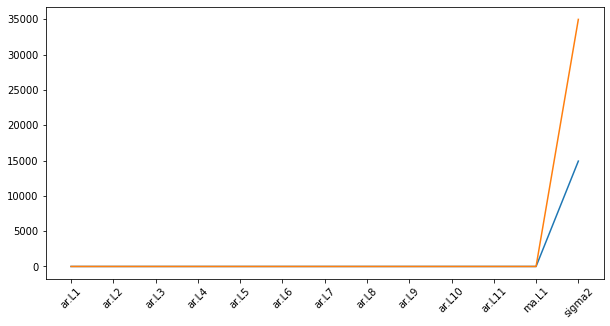

In [103]:
conf = model_fit.conf_int()
plt.figure(figsize=(10,5))
plt.plot(conf)
plt.xticks(rotation=45)
plt.show()

<h2> PREDIZIONE DEL MODELLO SUL TEST SET </h2>

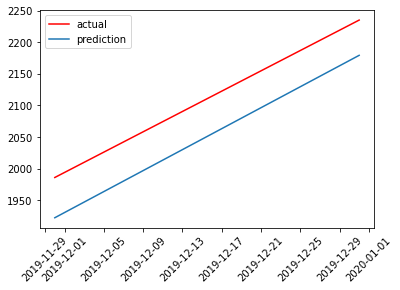

2019-11-30    1922.331249
2019-12-31    2179.230371
Freq: M, dtype: float64


In [104]:
#inizio e fine predizione
pred_start = test.index[0]
pred_end = test.index[-1]

#pred_start= len(train)
#pred_end = len(tsb)
#predizione del modello sul test
predictions_test= model_fit.predict(start=pred_start, end=pred_end)

plt.plot(test, color='red', label='actual')
plt.plot(predictions_test, label='prediction' )
plt.xticks(rotation=45)
plt.legend()
plt.show()

print(predictions_test)

In [105]:
pred_start

Timestamp('2019-11-30 00:00:00', freq='M')

<h3> CALCOLO RMSE </h3>

<p> La <b>radice dell'errore quadratico medio</b> indica la discrepanza fra i valori dei dati osservati e i valori dei dati stimati. 
    <br />
    Un valore pari a zero, indica un modello perfetto per i dati, per cui più il valore dell'<b>RMSE</b> si avvicina a zero, migliore sarà il modello per la serie </p>

In [106]:
import numpy as np
from statsmodels.tools.eval_measures import rmse
nrmse = rmse(predictions_test, test)/(np.max(test)-np.min(test))
print('RMSE = ', nrmse)

RMSE =  0.24036004189610002


<h1> PREDIZIONE TOTALE DEL MODELLO </h1>

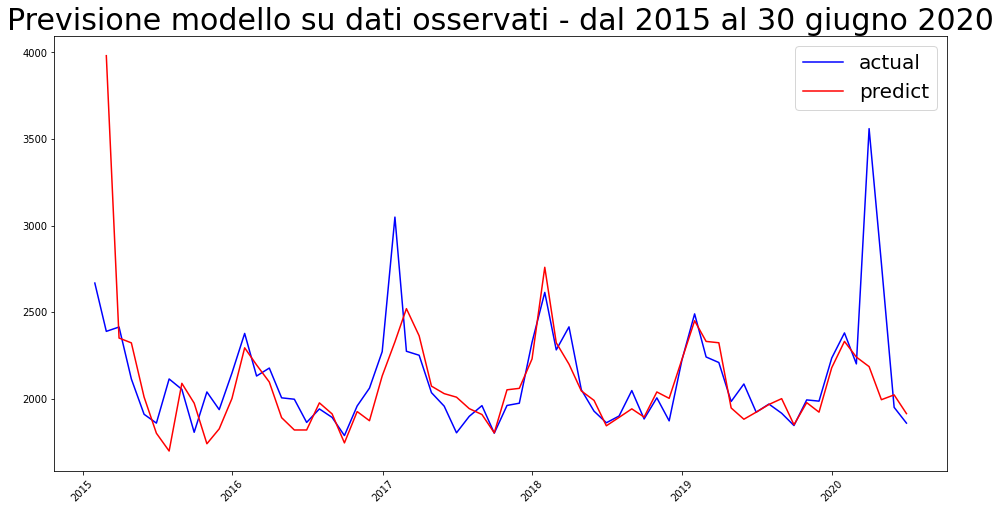

In [107]:
#inizio e fine predizione
start_prediction = ts.index[0]
end_prediction = ts.index[-1]

# predizione sul trend della serie storica includendo il 2020
predictions = model_fit.predict(start=start_prediction, end=end_prediction)

predictions_tot = predictions 

plt.figure(figsize=(16,8))
plt.title('Previsione modello su dati osservati - dal 2015 al 30 giugno 2020', size=30)
plt.plot(ts, color='blue', label='actual')
plt.plot(predictions_tot.iloc[1:], color='red', label='predict')
plt.xticks(rotation=45)
plt.legend(prop={'size': 20})
plt.show()

<h3> Calcolo della differenza tra i valori della previsione e i valori osservati </h3>

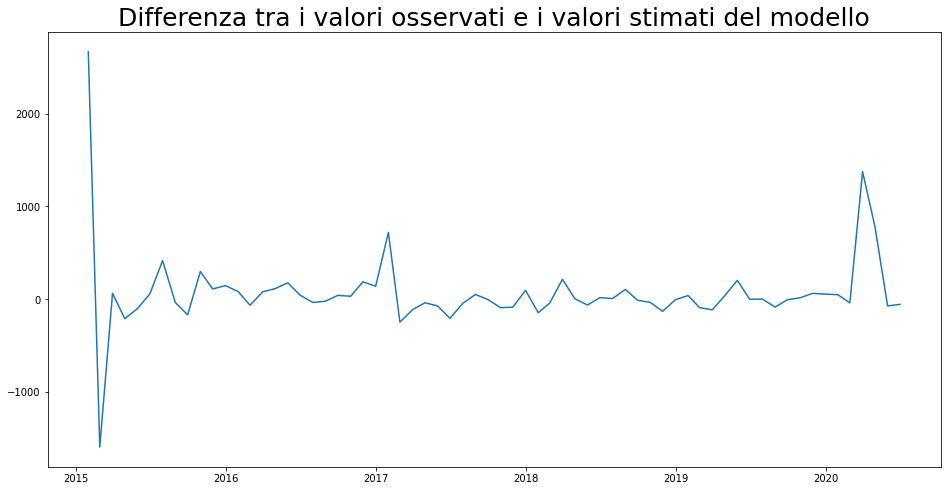

In [108]:
diff_predictions_tot = (ts - predictions_tot)
plt.figure(figsize=(16,8))
plt.title('Differenza tra i valori osservati e i valori stimati del modello', size=25)
plt.plot(diff_predictions_tot)
plt.show()

In [109]:
diff_predictions_tot['24-02-2020':].sum()

1994.9483997366315

In [110]:
predictions_tot.to_csv('csv/predictions_daily_ARIMA_8province.csv')

<h2> Calcolo Intervallo di Confidenza previsione del modello </h2>

In [126]:
forecast = model_fit.get_prediction(start=pred_start, end=pred_end)
in_c = forecast.conf_int()
print(forecast.predicted_mean)
print(test)
print(in_c)
print(in_c['upper TOTALE'] - in_c['lower TOTALE'])

2019-11-30    1922.331249
2019-12-31    2179.230371
Freq: M, dtype: float64
DATA
2019-11-30    1986
2019-12-31    2235
Freq: M, Name: TOTALE, dtype: int64
            lower TOTALE  upper TOTALE
2019-11-30   1612.719695   2231.942803
2019-12-31   1838.726217   2519.734526
2019-11-30    619.223109
2019-12-31    681.008310
Freq: M, dtype: float64
